In [1]:
from fastai.vision.all import *

In [4]:
from pathlib import Path

path = Path("car_damage")
path.ls()

(#3) [Path('car_damage/ major car accident damage'),Path('car_damage/ minor car damage'),Path('car_damage/car images')]

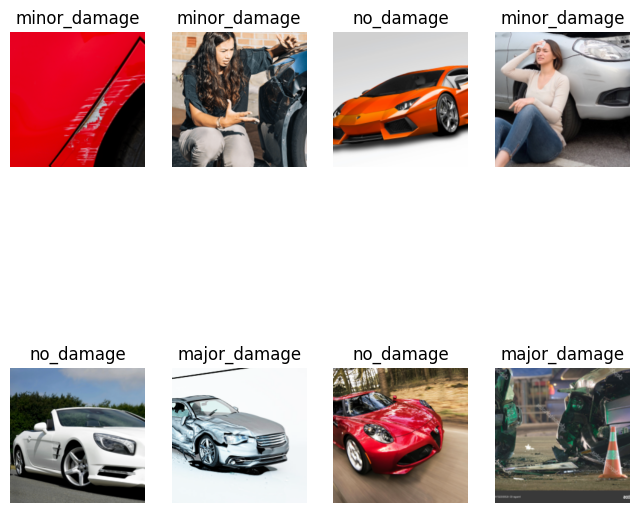

In [15]:

path = Path("car_damage")
files = get_image_files(path)

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=lambda _: files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256),
    batch_tfms=aug_transforms(size=224)
)

dls = dblock.dataloaders(path, bs=8)
dls.show_batch(max_n=9, figsize=(8,8))


In [17]:
learn = vision_learner(
    dls,
    resnet34,
    metrics=accuracy,
    wd=1e-2
)

In [18]:
learn.fine_tune(5, base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.534258,1.423121,0.555556,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.490605,1.165773,0.444444,00:06
1,1.463241,0.903008,0.444444,00:06
2,1.318791,0.631429,0.777778,00:06
3,1.226996,0.492657,0.777778,00:06
4,1.061566,0.518849,0.777778,00:06


In [14]:
learn.export("car_damage_model.pkl")


In [21]:
learn = load_learner("car_damage_model.pkl")
test_path = Path("testing")

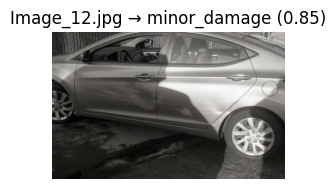

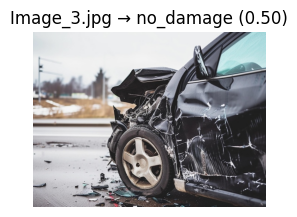

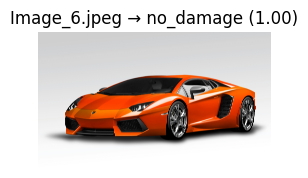

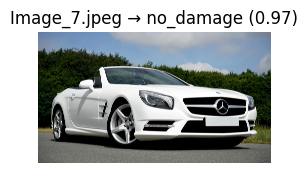

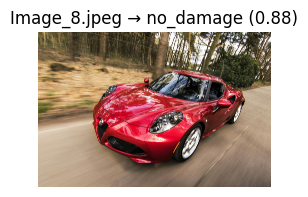

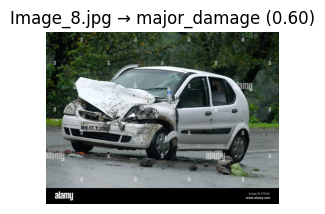

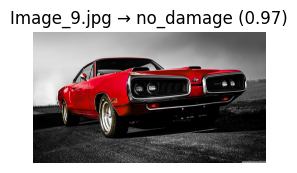

In [22]:
test_files = get_image_files(test_path)

for img in test_files:
    plt.figure(figsize=(3, 3))  
    img_pil = Image.open(img)
    plt.imshow(img_pil)
    plt.axis('off')

    pred, pred_idx, probs = learn.predict(img)
    plt.title(f"{img.name} → {pred} ({probs[pred_idx]:.2f})")
    plt.show()